# Plot 1xs result as a function for PhT, for different z(in one plot, separate by color and offset) per Q2 bins

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import lhapdf
import sys
sys.path.insert(1,'/Users/sj400/Duke/sidis_project/calculate_xs')
import tmdlib.tmd_fit as tmd
print(sys.path)
import iminuit
from iminuit import Minuit
from iminuit.cost import LeastSquares

import get_weighted 

import lhapdf
import sys
sys.path.insert(1,'/Users/sj400/Duke/sidis_project/calculate_xs')
import tmdlib.tmd_fit as tmd
print(sys.path)
import iminuit
from iminuit import Minuit
from iminuit.cost import LeastSquares

import tmdlib.tmd_fit_witherr as tmd_err

LHAPDF 6.5.3 loading /opt/homebrew/Cellar/lhapdf/6.5.3/share/LHAPDF/CJ15lo/CJ15lo_0000.dat
['/Users/sj400/Duke/notebook/Unpol_proposal', '/Users/sj400/Duke/sidis_project/calculate_xs', '/opt/homebrew/Cellar/root/6.26.06_2/lib/root', '', '/opt/homebrew/Cellar/lhapdf/6.5.3/lib/python3.10/site-packages', '/Users/sj400/miniconda3/lib/python310.zip', '/Users/sj400/miniconda3/lib/python3.10', '/Users/sj400/miniconda3/lib/python3.10/lib-dynload', '/Users/sj400/miniconda3/lib/python3.10/site-packages']
CJ15lo PDF set, member #0, version 2; LHAPDF ID = 12300
LHAPDF 6.5.3 loading /opt/homebrew/Cellar/lhapdf/6.5.3/share/LHAPDF/DSSFFlo/DSSFFlo_0211.dat
DSSFFlo PDF set, member #211, version 1; LHAPDF ID = 90211
LHAPDF 6.5.3 loading /opt/homebrew/Cellar/lhapdf/6.5.3/share/LHAPDF/DSSFFlo/DSSFFlo_0321.dat
DSSFFlo PDF set, member #321, version 1; LHAPDF ID = 90321
['/Users/sj400/Duke/notebook/Unpol_proposal', '/Users/sj400/Duke/sidis_project/calculate_xs', '/Users/sj400/Duke/sidis_project/calculate_xs'

In [2]:
#for pim
#df_1xs_zQ2xbjPhT = pd.read_csv('../Unpol_proposal/Materials/Shuo_Vlad_unpol_cs_results/default_1xs_2024/CS1xs_default_x1_stat0_pim_new.dat',delim_whitespace=True)
#for pip
df_1xs_x1_zQ2xbjPhT = pd.read_csv('../Unpol_proposal/Materials/Shuo_Vlad_unpol_cs_results/default/CS_default_x1_stat0/CS_default_x1_stat0_pip.dat',delim_whitespace=True)
#df_1xspim_zQ2xbjPhT.head()

In [3]:
PI = math.pi
print(PI)
#z_cuts=[0.3,0.4,0.5,0.6]
z_cuts=[0.3,0.35,0.4,0.45,0.5,0.55,0.6]
#Q2_cuts=[1,2,3,4,5]
Q2_cuts=[1,1.5,2,2.5,3]
xbj_cuts=[0,0.25]
#PhT_cuts = [0,0.2]
#PhT_cuts = [0,0.2]
#PhT_cuts = [0,0.2,0.4,0.6,0.8]
PhT_cuts = [0,0.1,0.2,0.3,0.4,0.5]
#PhT_cuts=[0.2,0.6]
#PhT_cuts=[0.2,0.4]
#phih_bins = [-3.14,-2.5,-2,-1.5,-1,-0.5,0,0.5,1,1.5,2,2.5,3.14]
#phih_bins =[-PI,-3*PI/5,-2*PI/5,-PI/5,PI/5,2*PI/5,3*PI/5,4*PI/5,PI]
phih_bins =[-PI,-0.8*PI,-0.6*PI,-0.4*PI,-0.15*PI,0,0.15*PI,0.4*PI,0.6*PI,0.8*PI,PI]

df_1xs_zQ2=df_1xs_x1_zQ2xbjPhT[(df_1xs_x1_zQ2xbjPhT['Ebeam']==11)&(df_1xs_x1_zQ2xbjPhT['x']>xbj_cuts[0])&(df_1xs_x1_zQ2xbjPhT['x']<xbj_cuts[1])]


3.141592653589793


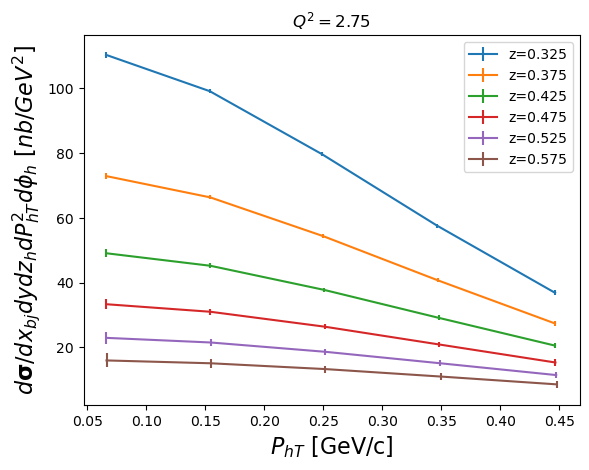

In [7]:
#plot for the Q2 bins
i_Q2=4

df_1xs_z=df_1xs_zQ2[(df_1xs_zQ2['Q2']>Q2_cuts[i_Q2-1])&(df_1xs_zQ2['Q2']<Q2_cuts[i_Q2])]
factor_zs=[10,9,8,7,6,5,4,3,2,1]
color=['b','g','r','c','m','y','navy','purple']
for i_z in range(1,len(z_cuts)):
    #print(z_cuts[i_z])
    df_1xs=df_1xs_z[(df_1xs_z['z']>z_cuts[i_z-1])&(df_1xs_z['z']<z_cuts[i_z])]
    #print(len(df_1xs))
    Fuus=[]
    Fuu_stats=[]
    pTs=[]
    for i_PhT in range(1,len(PhT_cuts)):
        df_1xs_PhT=df_1xs[(df_1xs['pT']>PhT_cuts[i_PhT-1])&(df_1xs['pT']<PhT_cuts[i_PhT])]
        #print(len(df_1xs_PhT))
        
        _Fuu = get_weighted.Get_weighted_average(df_1xs_PhT['value'].tolist(),df_1xs_PhT['stat'].tolist())[0]
        _Fuu_stat = get_weighted.Get_weighted_average(df_1xs_PhT['value'].tolist(),df_1xs_PhT['stat'].tolist())[1]
        _pT= get_weighted.Get_weighted_average_phi(df_1xs_PhT['pT'].tolist(),df_1xs_PhT['stat'].tolist())[0]
        #print(_pT)
        Fuus.append(_Fuu)
        Fuu_stats.append(_Fuu_stat)
        pTs.append(_pT)
    legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
    plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o')
plt.legend()
plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}d\phi_h}$ [$nb/GeV^2$]',fontsize=16)
plt.savefig('../Unpol_proposal/Materials/results/Fuu_Pt_'+str(i_Q2)+'.pdf')